# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Ne pas modifier
vol = pd.read_csv("../data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à affichervol
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

In [5]:
print(vol.shape)
vol.head()

(2283, 26)


,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


In [6]:
import seaborn as sns

EXERCICE - Plot avec titres et légende

Explorez la documentation de pyplot pour ajouter au graphe :
1. Un titre à la figure
2. Des titres aux axes
3. Une légende

[Text(0.5, 1.0, 'Map des corrélations'),
 Text(0.5, 113.09375, 'Donnée'),
 Text(158.09375, 0.5, 'Donnée')]

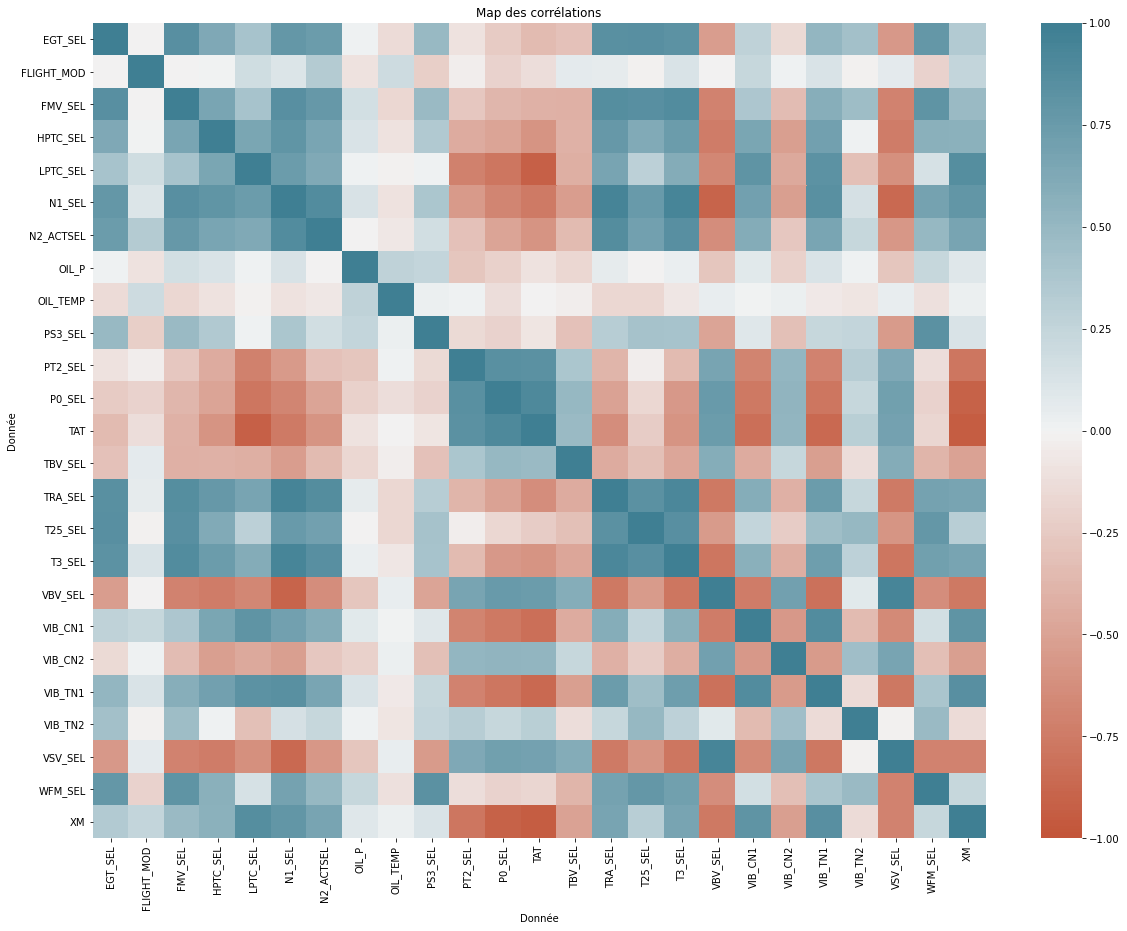

In [7]:
# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

graph=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))
graph.set(title='Map des corrélations',xlabel ="Donnée", ylabel ="Donnée")

# Essayer avec annot=True

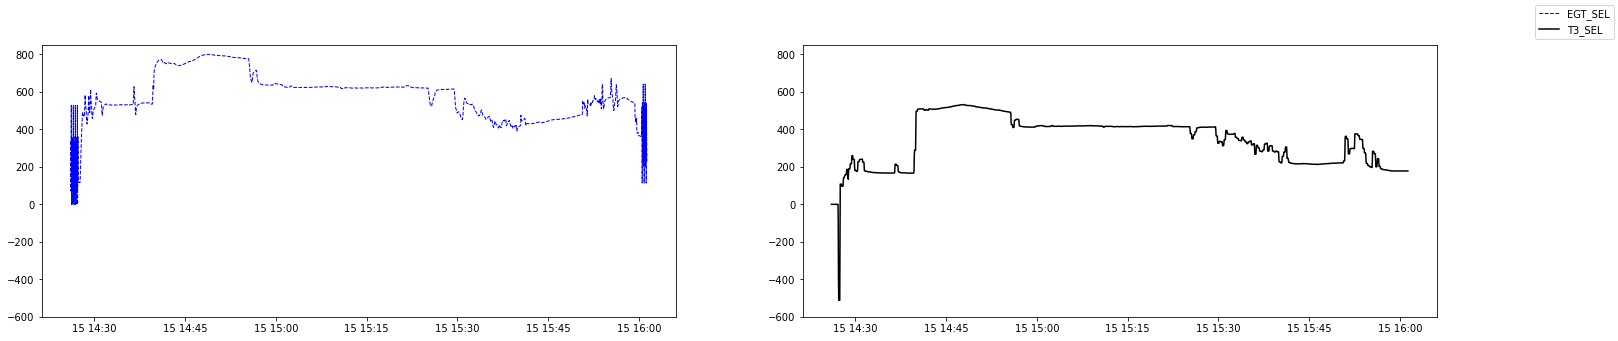

In [8]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1, label="EGT_SEL")
plt.ylim(-600,850)

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-',label="T3_SEL")
plt.ylim(-600,850)
fig.legend()

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

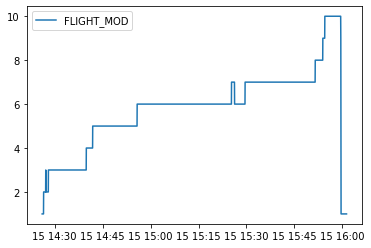

In [9]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

EXERCICE - Correpondance FLIGHT_MOD/phase de vol
1. Créez un liste définissant la correspondance FLIGHT_MOD/phase de vol
2. Ajoutez une nouvelle colonne 'FLIGHT_PHASE' au DataFrame contenant le nom de la phase. Une possibilité est d'utiliser la méthode "apply" et une fonction anonyme (lambda).

In [10]:
INDEX_phase_vol=["taxi","take_off","begin_clim","climb","cruise_climb","cruise","descent","approach","flare","landing"]

In [11]:
def func(i):
	return(INDEX_phase_vol[i-1])

vol["FLIGHT_PHASE"]=vol['FLIGHT_MOD'].apply(func)

In [12]:
vol.head()

,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM,FLIGHT_PHASE
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15,taxi
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15,taxi
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi


EXERCICE - Calcul du nombre de lignes par phase de vol
Groupez le DataFrame par phase de vol avec groupby() et aggrégez le résultat avec size().



In [13]:
time_by_phase=vol.groupby(["FLIGHT_PHASE"]).size()

<BarContainer object of 10 artists>

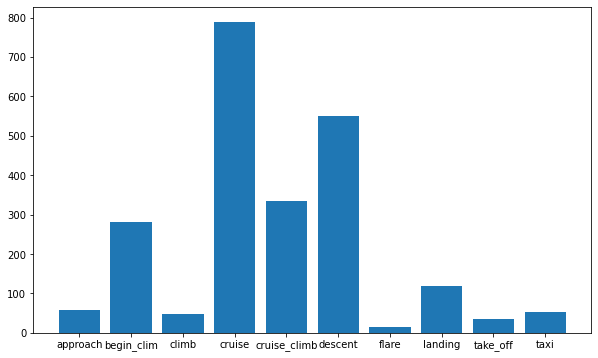

In [14]:
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

EXERCICE - Affichez la température T25 maximale par phase de vol sur un bar plot de couleur rouge.

In [15]:
T25_MAX_PHASE_VOL=vol.groupby(["FLIGHT_PHASE"])["T25_SEL"].max()

In [16]:
T25_MAX_PHASE_VOL

FLIGHT_PHASE
approach         73.5000
begin_clim       75.5000
climb           109.5000
cruise           70.5000
cruise_climb    111.0000
descent          58.0000
flare            56.7500
landing          46.7500
take_off         37.2500
taxi             35.1406
Name: T25_SEL, dtype: float64

<BarContainer object of 10 artists>

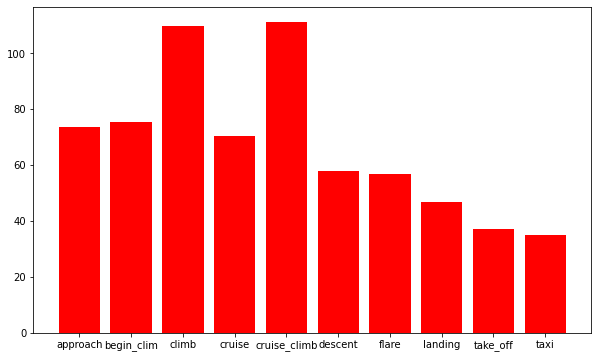

In [18]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(T25_MAX_PHASE_VOL.size), T25_MAX_PHASE_VOL, tick_label=T25_MAX_PHASE_VOL.index.tolist(),color="r")